You may use data from either the SLID study, or FISH in SAS Help.
The following instructions apply to SLID. Modifications to perform the assignment for the SAS FISH data set are at the end of this page.


Data for SLID, in doc sharing:
csv: SLIDLogWagesClean.csv SAS: dataimported_from_SLID.....sas7bdat
Note: I have included log wages as a transformed variable in the SLID data set.

This homework assignment uses the data from SLID – the Canadian Survey on Labor and Income Dynamics.
Please submit responses to the following questions, including plots and analysis, to the Week 3.:


1. Create a scatter-plot matrix for the continuous variables: wages,logwages, education and age. (10 pts)


2. Create two grouped scatter-plots for wages and education. One using sex as the labeled variable and the other using language as the labeled variable. (10 pts)


3. Create a regression model using wages as the dependent variable and education, age as independent variables. Generate an ANOVA table describing overall performance. Is the model a good fit? Explain using hypotheses testing, f-test and plots generated by SAS.(20 pts)


4. Create a regression model using log wages as the dependent variable and education, age as independent variables. Generate an ANOVA table describing overall performance. Is the model a good fit? Explain using hypotheses testing and .(20 pts)


5. Use grouping variables for sex and language and add these to the model. Select the grouping variable that creates the best model Create explain the performance lift (if any) over the previous models. (40 pts)


Modifications for FISH data set:
Perform the same analysis tests for FISH as in the SLID, but substitute  Weight for the dependent variable and Species for the grouping variable.


As you do not have a log transform, your job will be to perform multiple tests using different subsets of the variables (Length1,Length2 and so on) in order to arrive at the model that performs the best.
Click on the "Week Three Assignment" link above to submit your assignment, as well as to get more information regarding the due date and grading rubric.

## Question 1. Create a scatter-plot matrix for the continuous variables: wages,logwages, education and age. (10 pts)

In [48]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("/Users/RyanPaw/ANA620/SLIDLogWagesClean.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wages      3987 non-null   float64
 1   education  3987 non-null   float64
 2   age        3987 non-null   int64  
 3   sex        3987 non-null   object 
 4   language   3987 non-null   object 
 5   logwages   3987 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 187.0+ KB


In [50]:
df.head()

,wages,education,age,sex,language,logwages
0,10.56,15.0,40,Male,English,2.357073
1,11.00,13.2,19,Male,English,2.397895
2,17.76,14.0,46,Male,Other,2.876949
3,14.00,16.0,50,Female,English,2.639057
4,8.20,15.0,31,Male,English,2.104134


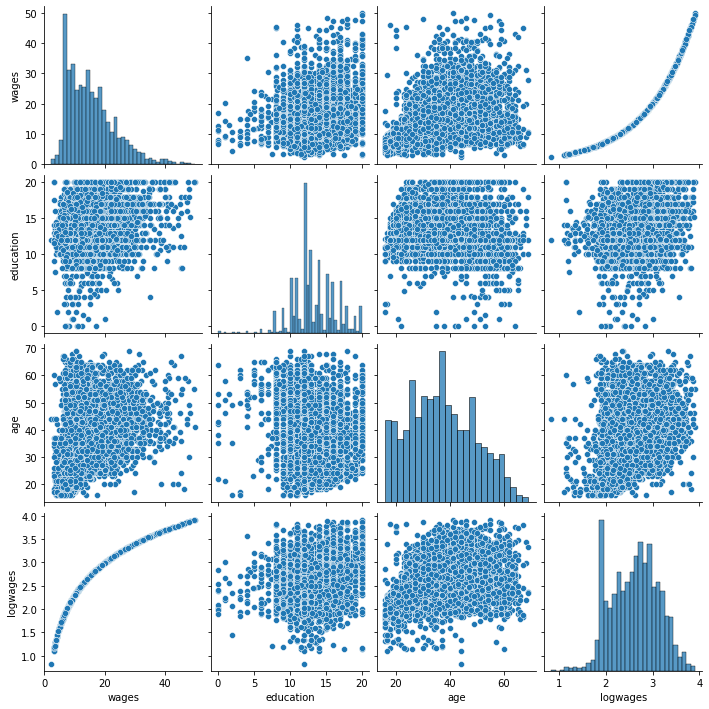

In [51]:
sns.pairplot(df, vars=['wages','education','age','logwages'],kind='scatter')

## Question 2. Create two grouped scatter-plots for wages and education. One using sex as the labeled variable and the other using language as the labeled variable. (10 pts)

Text(0.5, 1.0, 'Wages vs. Education Between Males & Females')

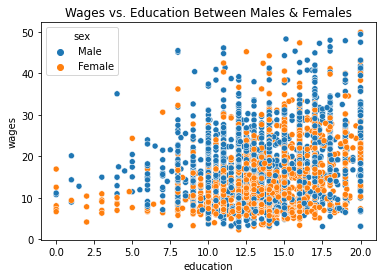

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline 

sns.scatterplot(y='wages',x='education', hue='sex', data=df)
plt.title('Wages vs. Education Between Males & Females')

Text(0.5, 1.0, 'Wages vs. Education Between Languages Spoken')

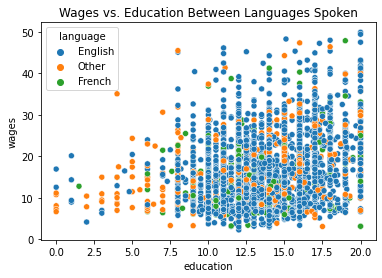

In [53]:
sns.scatterplot(y='wages',x='education', hue='language', data=df)
plt.title('Wages vs. Education Between Languages Spoken')

## Question 3. Create a regression model using wages as the dependent variable and education, age as independent variables. Generate an ANOVA table describing overall performance. Is the model a good fit? Explain using hypotheses testing, f-test and plots generated by SAS.(20 pts)

In [54]:
from sklearn.linear_model import LinearRegression

features = ['education','age']
target = 'wages'

x = df[features].values.reshape(-1, len(features))
y = df[target].values

lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [55]:
lm.coef_

array([0.90146438, 0.2570898 ])

In [56]:
lm.intercept_

-6.021652882753694

In [57]:
import statsmodels.formula.api as sm

model = sm.ols(formula='y ~ x', data=df)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     660.7
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.56e-248
Time:                        18:28:06   Log-Likelihood:                -13310.
No. Observations:                3987   AIC:                         2.663e+04
Df Residuals:                    3984   BIC:                         2.665e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0217      0.619     -9.729      0.000      -7.235      -4.808
x[0]           0.9015      0.036     25.209      0.000       0.831       0.972
x[1]           0.2571      0.009     28.721      0.000       0.240       0.275
==============================================================================
Omnibus:                      561.750   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1092.696
Skew:                           0.878   Prob(JB):                    5.30e-238
Kurtosis:                       4.870   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This multiple linear regression to explain 'wages' can be modeled as:

wages = - 6.02 + 0.90 * education + 0.25 * age

The intercept was calculated to be = -6.021652882753694

The coefficient for each variable was calculated to be: 

education = 0.90146438

age = 0.2570898

I calculated the multiple regression model for wages using 'education' and 'age' as the independent variables. My R-squared was calculated to be 0.249. This means 24.9% of the variation from our dependent variable can be explained by our independent variables.

The F-statistic for our model was calculated to be 660.7. This is a high F-statistic value and shows that the independent variables, 'education' and 'age', are a good fit for our model. 

The t-value for 'education' and 'age' are calculated to be 25.209 and 28.721, respectively. Both p-values are <0.001, which shows that the relationship is statistically significant (Reject the null hypothesis, H0, and accept the alternative hypothesis, H1).

In conclusion, the model is a good fit.

## Question 4. Create a regression model using log wages as the dependent variable and education, age as independent variables. Generate an ANOVA table describing overall performance. Is the model a good fit? Explain using hypotheses testing and .(20 pts)

In [58]:
features1 = ['education','age']
target1 = 'logwages'

x1 = df[features1].values.reshape(-1, len(features1))
y1 = df[target1].values

lm1 = LinearRegression()
lm1.fit(x1,y1)

LinearRegression()

In [59]:
lm1.coef_

array([0.05403174, 0.01775147])

In [60]:
lm1.intercept_

1.2402071776089267

In [61]:
model1 = sm.ols(formula='y1 ~ x1', data=df)
fitted1 = model.fit()
fitted1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     660.7
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          1.56e-248
Time:                        18:28:06   Log-Likelihood:                -13310.
No. Observations:                3987   AIC:                         2.663e+04
Df Residuals:                    3984   BIC:                         2.665e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0217      0.619     -9.729      0.000      -7.235      -4.808
x[0]           0.9015      0.036     25.209      0.000       0.831       0.972
x[1]           0.2571      0.009     28.721      0.000       0.240       0.275
==============================================================================
Omnibus:                      561.750   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1092.696
Skew:                           0.878   Prob(JB):                    5.30e-238
Kurtosis:                       4.870   Cond. No.                         236.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This multiple linear regression to explain 'logwages' can be modeled as:

wages = 1.24 + 0.05 * education + 0.02 * age

The intercept was calculated to be = 1.2402071776089267

The coefficient for each variable was calculated to be: 

education = 0.05403174

age = 0.01775147

I calculated the multiple regression model for logwages using 'education' and 'age' as the independent variables. My R-squared was calculated to be 0.260. This means 26% of the variation from our dependent variable can be explained by our independent variables.

The F-statistic for our model was calculated to be 699.4. This is a high F-statistic value and shows that the independent variables, 'education' and 'age', are a good fit for our model. 

The t-value for 'education' and 'age' are calculated to be 23.790 and 31.224, respectively. Both p-values are <0.001, which shows that the relationship is statistically significant (Reject the null hypothesis, H0, and accept the alternative hypothesis, H1).

In conclusion, the model is a good fit.

## Question 5. Use grouping variables for sex and language and add these to the model. Select the grouping variable that creates the best model Create explain the performance lift (if any) over the previous models. (40 pts)

In [62]:
df2 = df.copy()

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   wages      3987 non-null   float64
 1   education  3987 non-null   float64
 2   age        3987 non-null   int64  
 3   sex        3987 non-null   object 
 4   language   3987 non-null   object 
 5   logwages   3987 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 187.0+ KB


In [64]:
#Male = 0, Female = 1
df2['sex'] = df2['sex'].str.replace('Male','0').str.replace('Female','1').astype('int64')
#English = 0, French = 1, Other = 2
df2['language'] = df2['language'].str.replace('English','0').str.replace('French','1').str.replace('Other','2').astype('int64')

In [65]:
df2.head()

,wages,education,age,sex,language,logwages
0,10.56,15.0,40,0,0,2.357073
1,11.00,13.2,19,0,0,2.397895
2,17.76,14.0,46,0,2,2.876949
3,14.00,16.0,50,1,0,2.639057
4,8.20,15.0,31,0,0,2.104134


In [66]:
#Grouping variable: sex
features2 = ['education','age','sex']
target2 = 'wages'

x2 = df2[features2].values.reshape(-1, len(features2))
y2 = df2[target2].values

lm2 = LinearRegression()
lm2.fit(x2,y2)

LinearRegression()

In [67]:
lm2.coef_

array([ 0.91537613,  0.25554062, -3.4544759 ])

In [68]:
lm2.intercept_

-4.415986866985081

In [69]:
model2 = sm.ols(formula='y2 ~ x2', data=df2)
fitted2 = model2.fit()
fitted2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y2   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     561.5
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          2.34e-304
Time:                        18:28:06   Log-Likelihood:                -13178.
No. Observations:                3987   AIC:                         2.636e+04
Df Residuals:                    3983   BIC:                         2.639e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4160      0.607     -7.279      0.000      -5.605      -3.227
x2[0]          0.9154      0.035     26.449      0.000       0.848       0.983
x2[1]          0.2555      0.009     29.505      0.000       0.239       0.273
x2[2]         -3.4545      0.209    -16.521      0.000      -3.864      -3.045
==============================================================================
Omnibus:                      596.435   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1267.766
Skew:                           0.891   Prob(JB):                    5.11e-276
Kurtosis:                       5.111   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
#Grouping variable: language
features3 = ['education','age','language']
target3 = 'wages'

x3 = df2[features3].values.reshape(-1, len(features3))
y3 = df2[target3].values

lm3 = LinearRegression()
lm3.fit(x3,y3)

LinearRegression()

In [71]:
lm3.coef_

array([0.9027246 , 0.2567208 , 0.06218901])

In [72]:
lm3.intercept_

-6.043909943334667

In [73]:
model3 = sm.ols(formula='y3 ~ x3', data=df2)
fitted3 = model3.fit()
fitted3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y3   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     440.4
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.22e-247
Time:                        18:28:06   Log-Likelihood:                -13310.
No. Observations:                3987   AIC:                         2.663e+04
Df Residuals:                    3983   BIC:                         2.665e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0439      0.622     -9.722      0.000      -7.263      -4.825
x3[0]          0.9027      0.036     25.136      0.000       0.832       0.973
x3[1]          0.2567      0.009     28.513      0.000       0.239       0.274
x3[2]          0.0622      0.162      0.384      0.701      -0.255       0.379
==============================================================================
Omnibus:                      562.287   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1094.134
Skew:                           0.878   Prob(JB):                    2.58e-238
Kurtosis:                       4.871   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

I compared the grouping variables 'sex' and 'language' into my wages model with age and education as my independent variables.

When I used 'sex' as my grouping variable, my R-squared was calculated to be 0.297. This means 29.7% of the variation from our dependent variable can be explained by our independent variables. This performed better than 'language' as the grouping variable, with an R-squared calculated at 0.249. 

The F-statistic for 'sex' as the grouping variable in our model was calculated to be 561.3. The F-statistic for 'language' as the grouping variable in our model was calculated to be 440.4. Since 'sex' has a higher F-statistic, this shows that 'sex' is the better grouping variable because it's a better fit for our model. 

The p-value for 'sex' as the grouping variable was calculated to be <0.001 and a t-value of -16.521, which shows that the relationship is statistically significant (Reject the null hypothesis, H0). The p-value for 'language' as the grouping variable was calculated to be 0.701 and a t-value of 0.384. Since the p-value is greater than 0.05, it shows that the relationship NOT statistically significant (Accept the null hypothesis, H0, reject the alternative hypothesis, H1). Therefore, 'sex' performed better than 'language' as the grouping variable.

##### In conclusion, 'sex' is the best grouping variable for the Wages model. 

For 'sex' as the grouping variable, this can be modeled as:


Wages = -4.415 + 0.915 * Education + 0.256 * Age - 3.454 * Sex

Wages(Male = 0):

 -4.415 + 0.915 * Education + 0.256 * Age - 3.454 * (0)
            
 = -4.415 + 0.915 * Education + 0.256 * Age


Wages(Female = 1):

 -4.415 + 0.915 * Education + 0.256 * Age - 3.454 * (1)
            
 = -7.869 + 0.915 * Education + 0.256 * Age
 
<br>
 
For 'language' as the grouping variable, this can be modeled as:

Wages = -6.043 + 0.902 * Education + 0.257 * Age + 0.062 * Language

Wages(English = 0): 

 -6.043 + 0.902 * Education + 0.257 * Age + 0.062 * (0)
 
 = -6.043 + 0.902 * Education + 0.257 * Age
 

Wages(French = 1):

 -6.043 + 0.902 * Education + 0.257 * Age + 0.062 * (1)
  
  = -5.981 + 0.902 * Education + 0.257 * Age
 

Wages(Other = 2):

 -6.043 + 0.902 * Education + 0.257 * Age + 0.062 * (2)
 
  = -5.919 + 0.902 * Education + 0.257 * Age